In [449]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [450]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [451]:
dataset = pd.read_csv("loan_approval_dataset.csv")
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Cleaning and classifying data

In [452]:
# Create an array of the names of all the variables
independent_variables = list(dataset.keys())
independent_variables.remove(" loan_status")
independent_variables.remove("loan_id")

dependent_variable = pd.DataFrame(dataset[" loan_status"])

# Extracting only numeric data
num_data = list(dataset.select_dtypes(include = "number"))
num_data.remove("loan_id")

In [453]:
def dec_tree_generator(independent_variable):

    feature_name = independent_variable
    independent_variable_df = pd.DataFrame(dataset[independent_variable])
    
    x_train, x_test, y_train, y_test = train_test_split(independent_variable_df, dependent_variable, test_size= 0.25)

    # Create a decision tree object and train the model
    dec_tree = DecisionTreeClassifier(max_depth=3)
    dec_tree.fit(x_train, y_train)

    # Plot the training tree
    f = plt.figure(figsize= (30, 8))
    plot_tree(dec_tree, feature_names= [feature_name], class_names= ["Approved", "Rejected"], filled=True, rounded = True)


    # On the train set, predict y using x
    y_train_pred = dec_tree.predict(x_train)
    # On the test set, predict y using x
    y_test_pred = dec_tree.predict(x_test)

    print("Train set accuracy: ", dec_tree.score(x_train, y_train))
    print("Test set accuracy: ", dec_tree.score(x_test, y_test))
    print()
    
    # Create new figure
    plt.figure(figsize=(16, 8))

    # Plot 1st subplot in the figure
    plt.subplot(1, 2, 1)
    plt.title("Train Set")
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f") 
    
    #heat map is just to visualize, the data is from confusion matrix
    # Plot 2nd subplot in the figure
    plt.subplot(1, 2, 2)
    plt.title("Test Set")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f") 

    # Print TPR FPR for test and train sets
    cm_train = confusion_matrix(y_train, y_train_pred)

    true_positive_rate = cm_train[1][1]/(cm_train[1][0] + cm_train[1][1])
    print("Train set true positive rate:", true_positive_rate)
    false_positive_rate = cm_train[0][1]/(cm_train[0][1]+cm_train[0][0])
    print("Train set false positive rate:", false_positive_rate)
    print("")

    cm_test = confusion_matrix(y_test, y_test_pred)

    true_positive_rate = cm_test[1][1]/(cm_test[1][0] + cm_test[1][1])
    print("Test set true positive rate:", true_positive_rate)
    false_positive_rate = cm_test[0][1]/(cm_test[0][1]+cm_test[0][0])
    print("Test set false positive rate:", false_positive_rate)

    return dec_tree


# Generate decision tree model for each and every one of the numeric datas

In [454]:
#for i in range(len(num_data)):
#    dec_tree_generator(num_data[i])

### Note that cibil_score has a clear edge for predicting the loan approval status in comparison to the other numeric predictors

Train set accuracy:  0.9497032177444549
Test set accuracy:  0.9653558052434457

Train set true positive rate: 0.9902597402597403
Train set false positive rate: 0.07567293042153378

Test set true positive rate: 0.9973753280839895
Test set false positive rate: 0.05240174672489083


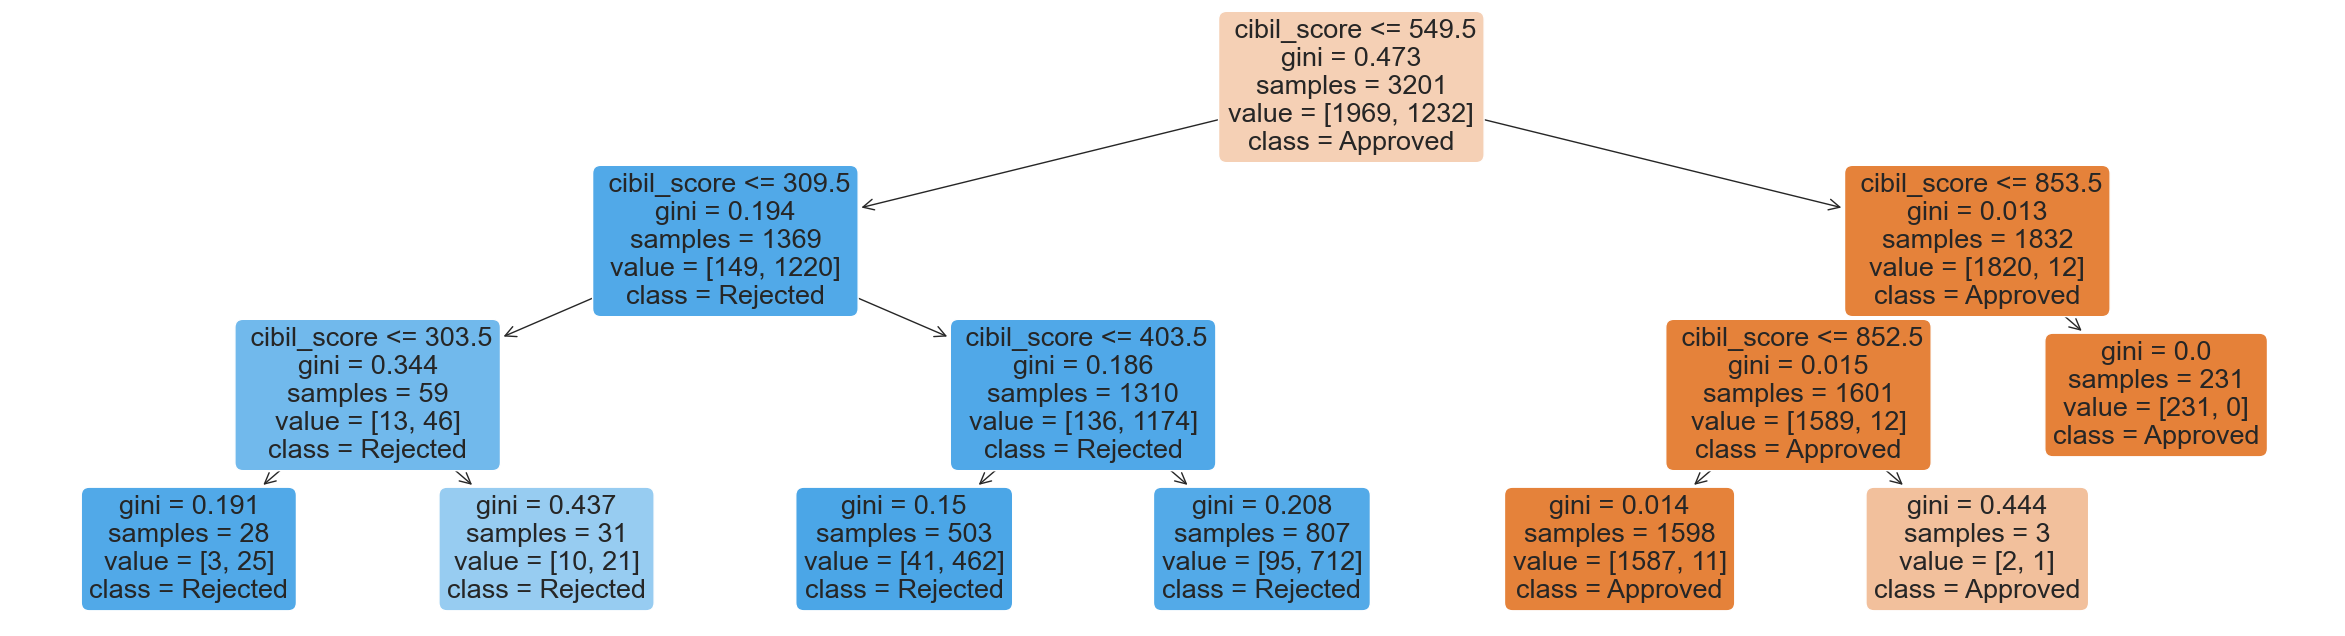

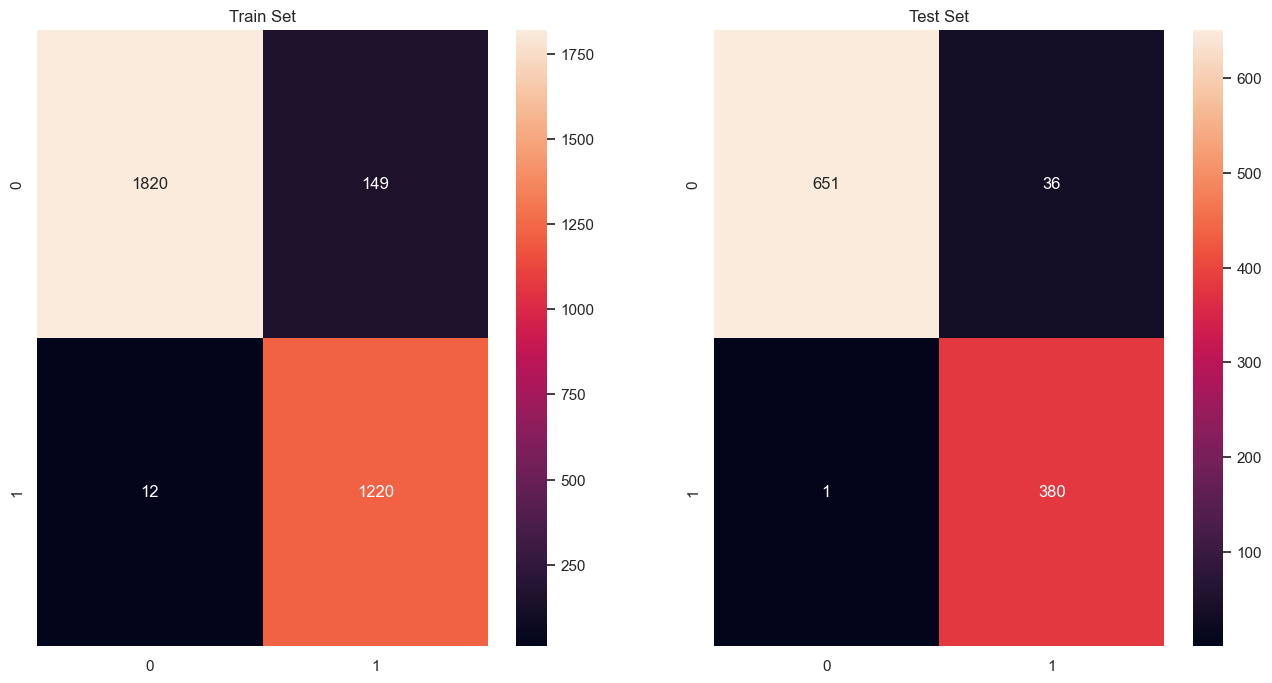

In [455]:
credit_score_dec_tree = dec_tree_generator(" cibil_score")

# Creating a multivariate decision tree to improve our prediction

Train set accuracy:  0.964698531708841
Test set accuracy:  0.9625468164794008

Train set true positive rate: 0.9898648648648649
Train set false positive rate: 0.05007436787307883

Test set true positive rate: 0.9906759906759907
Test set false positive rate: 0.056338028169014086


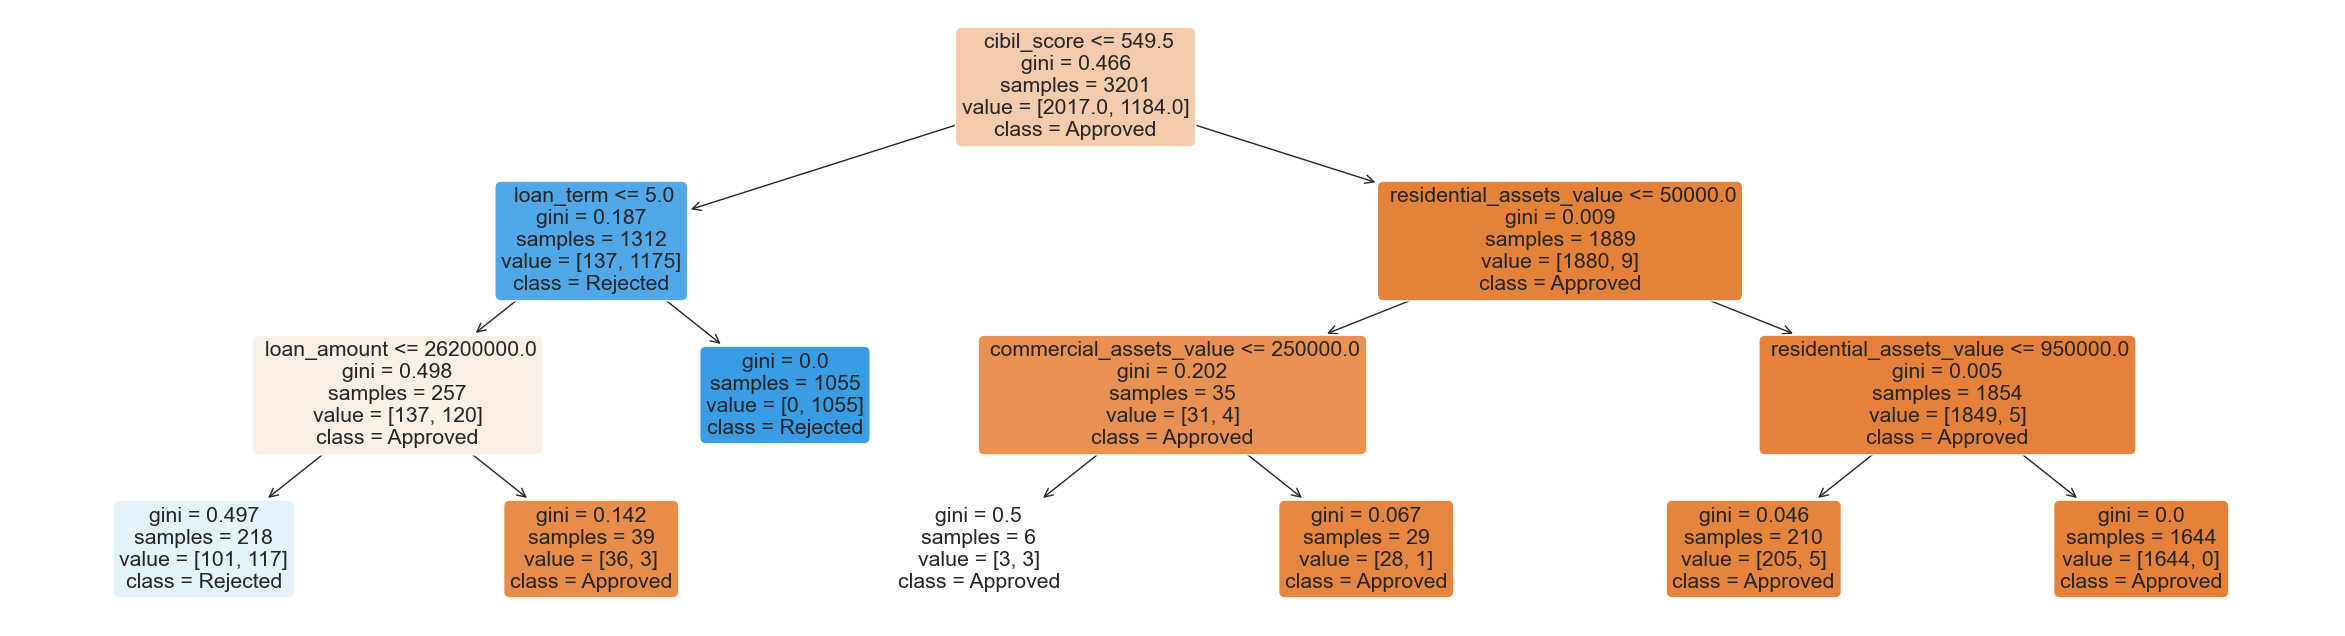

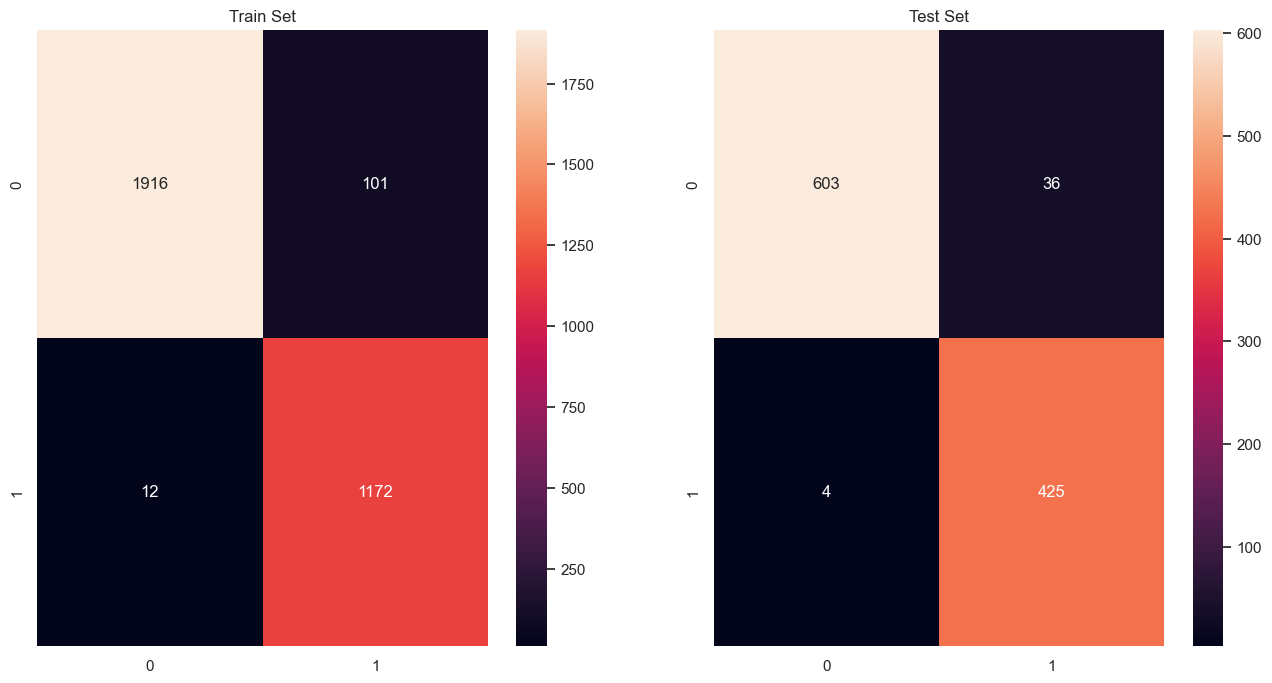

In [456]:
# Create a multivariate decision tree
feature_name = num_data
independent_variable_df = pd.DataFrame(dataset[num_data])

x_train, x_test, y_train, y_test = train_test_split(independent_variable_df, dependent_variable, test_size= 0.25)

# Create a decision tree object and train the model
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(x_train, y_train)

# Plot the training tree
f = plt.figure(figsize= (30, 8))
plot_tree(dec_tree, feature_names= x_train.columns, class_names= ["Approved", "Rejected"], filled=True, rounded = True)


# On the train set, predict y using x
y_train_pred = dec_tree.predict(x_train)
# On the test set, predict y using x
y_test_pred = dec_tree.predict(x_test)

print("Train set accuracy: ", dec_tree.score(x_train, y_train))
print("Test set accuracy: ", dec_tree.score(x_test, y_test))
print()

# Create new figure
plt.figure(figsize=(16, 8))

# Plot 1st subplot in the figure
plt.subplot(1, 2, 1)
plt.title("Train Set")
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f") 

#heat map is just to visualize, the data is from confusion matrix
# Plot 2nd subplot in the figure
plt.subplot(1, 2, 2)
plt.title("Test Set")
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f") 

# Print TPR FPR for test and train sets
cm_train = confusion_matrix(y_train, y_train_pred)

true_positive_rate = cm_train[1][1]/(cm_train[1][0] + cm_train[1][1])
print("Train set true positive rate:", true_positive_rate)
false_positive_rate = cm_train[0][1]/(cm_train[0][1]+cm_train[0][0])
print("Train set false positive rate:", false_positive_rate)
print("")

cm_test = confusion_matrix(y_test, y_test_pred)

true_positive_rate = cm_test[1][1]/(cm_test[1][0] + cm_test[1][1])
print("Test set true positive rate:", true_positive_rate)
false_positive_rate = cm_test[0][1]/(cm_test[0][1]+cm_test[0][0])
print("Test set false positive rate:", false_positive_rate)



<Axes: xlabel=' cibil_score', ylabel=' loan_status'>

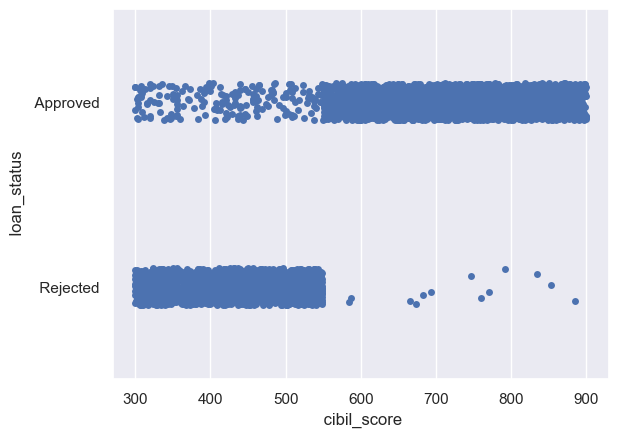

In [457]:
sb.stripplot(x = " cibil_score", y = " loan_status", data = dataset)


## Filter the original dataset into a dataset of APPROVED loans only

<Figure size 5000x5000 with 0 Axes>

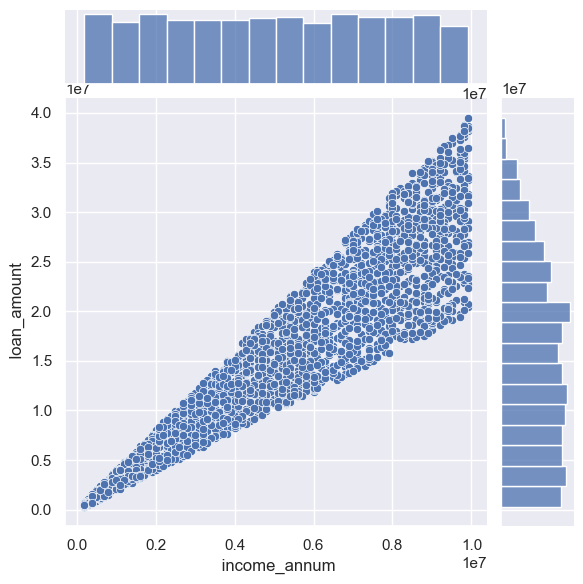

In [458]:

approved_dataset = dataset[[" loan_amount", " income_annum", " loan_status"]]
approved_dataset = approved_dataset[approved_dataset[" loan_status"] == " Approved"]
plt.figure(figsize= (50, 50))
sb.jointplot(data = approved_dataset, y = " loan_amount", x = " income_annum")

# Create a linear regression function

In [459]:
from sklearn.linear_model import LinearRegression

def linear_regression(dataset, x, y):
    x = pd.DataFrame(dataset[x])
    y = pd.DataFrame(dataset[y])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    regressor = LinearRegression()
    regressor.fit(x_train, y_train)

    y_test_pred = regressor.predict(x_test)
    
    f, ax = plt.subplots(figsize = (16, 10))
    
    # set the x axis intervals
    xinterval = np.arange(0, 11000000, 1000000)
    ax.set_xticks(xinterval)

    plt.scatter(x_train, y_train, s=8) # s is to resize the marker (points)
    plt.plot(x_test, y_test_pred, color = 'k')

    plt.show()

## Draw a linear regression line for the relationship between `loan_amount` and `income_annum`

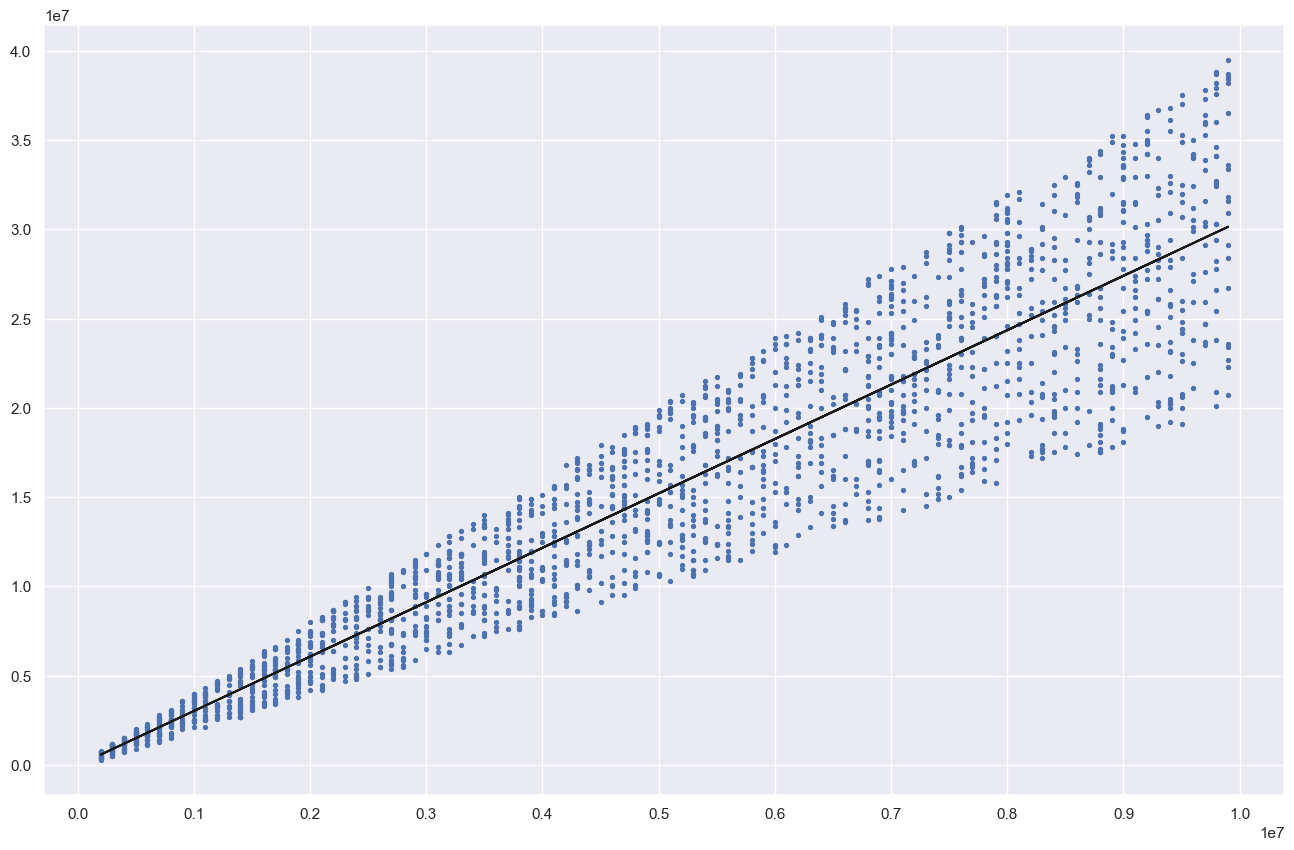

In [460]:
linear_regression(approved_dataset, " income_annum", " loan_amount")

## Use credit score to further improve the accuracy of our prediction

In [461]:
# rules used to split the decision tree
tree_threshold = credit_score_dec_tree.tree_.threshold

credit_score = int(input("Enter credit score: "))

# Retrieve the index of the leaf that the user's credit score ended up in
leaf_index = credit_score_dec_tree.apply([[credit_score]])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Find the range where the user's credit score lies

In [462]:
EXTREME_HIGH_VALUE = 99999999999
EXTREME_LOW_VALUE = 0

# the final rule in the tree was to the left
if tree_threshold[leaf_index - 1] != -2:

    # if is at the right branch of the tree
    if tree_threshold[leaf_index - 2] == -2:

        upper = max(tree_threshold[leaf_index - 1], tree_threshold[leaf_index - 5])
        lower = min(tree_threshold[leaf_index - 1], tree_threshold[leaf_index - 5])            

    #if is at the left branch of the tree, i.e. it is the most left node
    else:
        upper = tree_threshold[leaf_index - 1]
        lower = EXTREME_LOW_VALUE

# the final rule in the tree was to the right (every index just + 1 because it's from the right, need to skip the left node)
if tree_threshold[leaf_index - 1] == -2:

    # if is at the right branch of the tree, i.e. it is the most right node
    if tree_threshold[leaf_index - 3] == -2:
        lower = tree_threshold[leaf_index - 2]
        upper = EXTREME_HIGH_VALUE

    else:
        #if is at the left branch of the tree
        upper = max(tree_threshold[leaf_index - 2], tree_threshold[leaf_index - 3])
        lower = min(tree_threshold[leaf_index - 2], tree_threshold[leaf_index - 3])

# convert from array to integer
lower = int(lower)
upper = int(upper)


/var/folders/_2/sy4m7s491c3640tycmrbkpn80000gn/T/ipykernel_83964/4232548605.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  upper = int(upper)


## Create a new dataset that is specific to the user's credit score

### We are just finding out the standard deviation of loans approved here, we will find probability of approval later

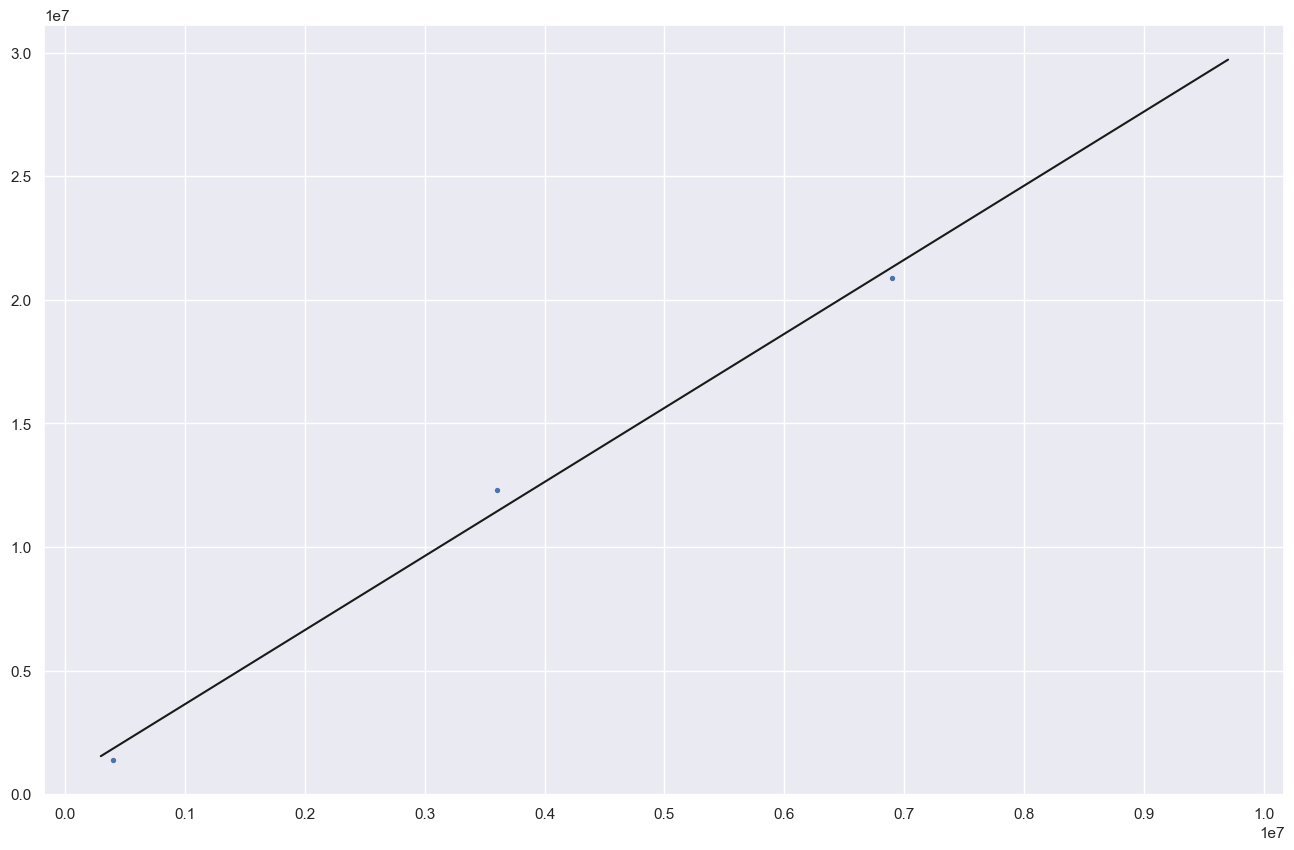

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 95 to 2920
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    loan_amount   5 non-null      int64 
 1    income_annum  5 non-null      int64 
 2    loan_status   5 non-null      object
 3    cibil_score   5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 200.0+ bytes


In [463]:
approved_dataset = dataset[[" loan_amount", " income_annum", " loan_status", " cibil_score"]]
approved_dataset = approved_dataset[(approved_dataset[" loan_status"] == " Approved") & (approved_dataset[" cibil_score"] > lower) & (approved_dataset[" cibil_score"] < upper)]

linear_regression(approved_dataset, " income_annum", " loan_amount")
approved_dataset.info()

### Create a 2D array to separate the loan amounts according to intervals of annual income

In [464]:
import math

def hash(value):
    return int(math.floor(value/500000.0))

### Adding the loan amount to the interval specific to their annual income 

In [465]:
loan_amount_interval = [[] for i in range(20)]

for i in range(len(approved_dataset)):

    loan_amount = approved_dataset.iloc[i, 0]
    income_annum = approved_dataset.iloc[i, 1]

    index = hash(income_annum)

    loan_amount_interval[index].append(loan_amount)

## User input their income, compute the mean and standard deviation according to their income range

In [466]:
input_income = int(input("Enter your annual income: "))

In [467]:
def basic_stats(income):
    
    index = hash(income)

    mean = np.mean(loan_amount_interval[index])

    standard_deviation = np.std(loan_amount_interval[index])

    print("Mean:", mean)
    print("Standard deviation:", standard_deviation)

    return mean, standard_deviation, index
    

In [468]:
mean, standard_deviation, index = basic_stats(input_income)

Mean: nan
Standard deviation: nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divi

### Create a new linear regression function that includes a boxplot at the specified annual income range

In [469]:
from matplotlib.patches import Rectangle

In [470]:
def linear_regression_pro(dataset, x, y):

    x = pd.DataFrame(dataset[x])
    y = pd.DataFrame(dataset[y])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    regressor = LinearRegression()
    regressor.fit(x_train, y_train)

    y_test_pred = regressor.predict(x_test)

    f, ax = plt.subplots(figsize = (16, 10))
    
    # set the x axis intervals
    xinterval = np.arange(0, 11000000, 1000000)
    ax.set_xticks(xinterval)

    # vertical line to simulate box plot
    # plt.axvline(x = index*1000000, ymin = 1 - (mean - standard_deviation)/100000000, ymax = 1 - (mean + standard_deviation)/100000000, color = 'r')

    # draw a rectangle
    ax.add_patch(Rectangle(((index)*500000 - 250000, mean - standard_deviation), 500000, 2*standard_deviation, facecolor = "None", edgecolor = 'red'))
    ax.add_patch(Rectangle(((index)*500000 - 250000, mean - standard_deviation), 500000, standard_deviation, facecolor = "None", edgecolor = 'red')) # to draw the mean line

    print("Mean:", mean)
    print("Upper bound:", mean + standard_deviation)
    print("Lower bound:", mean - standard_deviation)


    plt.scatter(x_train, y_train, s=8) # s is to resize the marker (points)
    plt.plot(x_test, y_test_pred, color = 'k')

Mean: nan
Upper bound: nan
Lower bound: nan


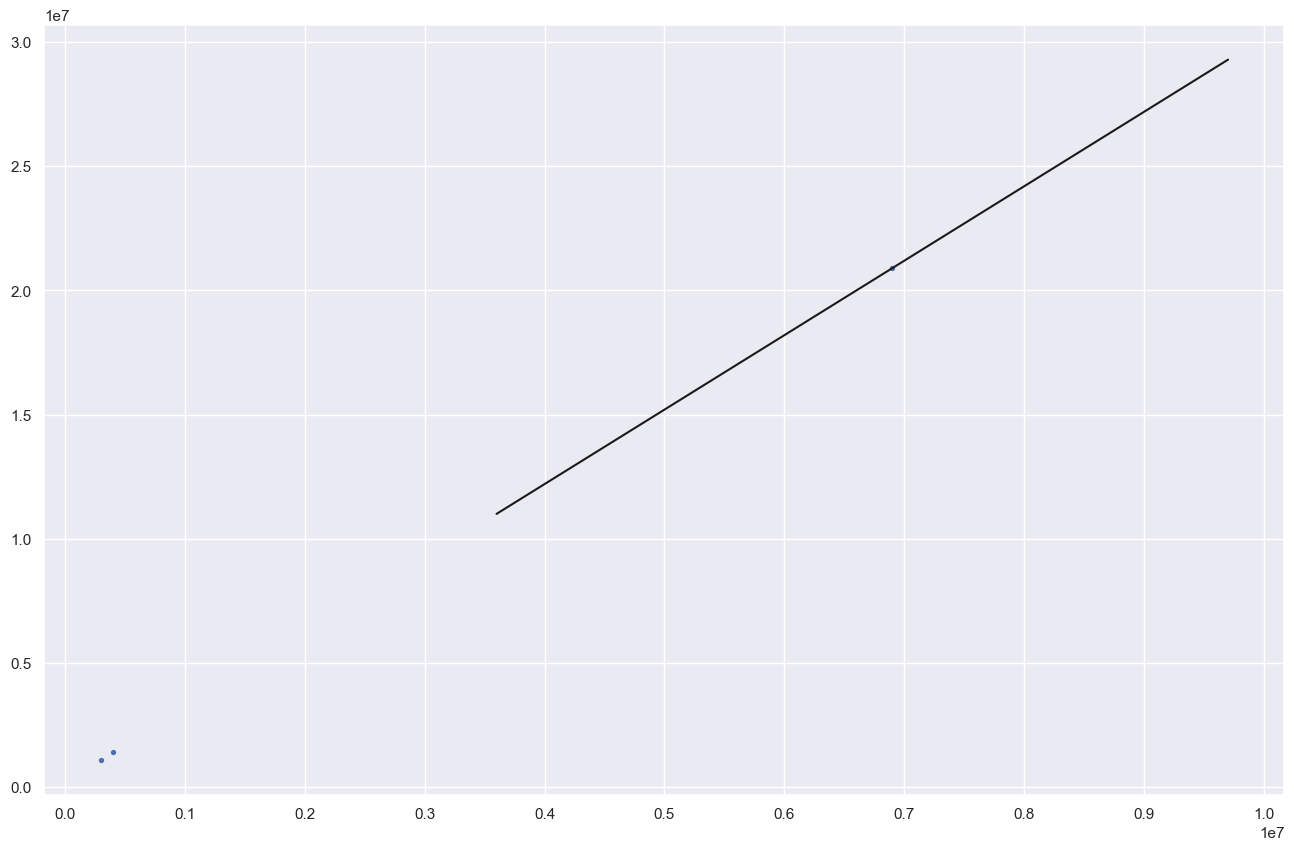

In [471]:
linear_regression_pro(approved_dataset, " income_annum", " loan_amount")

# Raphel's part
### find probability of the approval of the loan

[Text(0.5576923076923077, 0.9, ' cibil_score <= 549.5\ngini = 0.47\nsamples = 4269\nvalue = [2656, 1613]\nclass = Approved'),
 Text(0.3076923076923077, 0.7, ' cibil_score <= 309.5\ngini = 0.186\nsamples = 1785\nvalue = [185, 1600]\nclass = Rejected'),
 Text(0.15384615384615385, 0.5, ' cibil_score <= 303.5\ngini = 0.326\nsamples = 78\nvalue = [16.0, 62.0]\nclass = Rejected'),
 Text(0.07692307692307693, 0.3, ' cibil_score <= 300.5\ngini = 0.229\nsamples = 38\nvalue = [5, 33]\nclass = Rejected'),
 Text(0.038461538461538464, 0.1, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = Rejected'),
 Text(0.11538461538461539, 0.1, 'gini = 0.137\nsamples = 27\nvalue = [2, 25]\nclass = Rejected'),
 Text(0.23076923076923078, 0.3, ' cibil_score <= 304.5\ngini = 0.399\nsamples = 40\nvalue = [11, 29]\nclass = Rejected'),
 Text(0.19230769230769232, 0.1, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = Approved'),
 Text(0.2692307692307692, 0.1, 'gini = 0.342\nsamples = 32\nvalue = [7, 25]\nclass = Reje

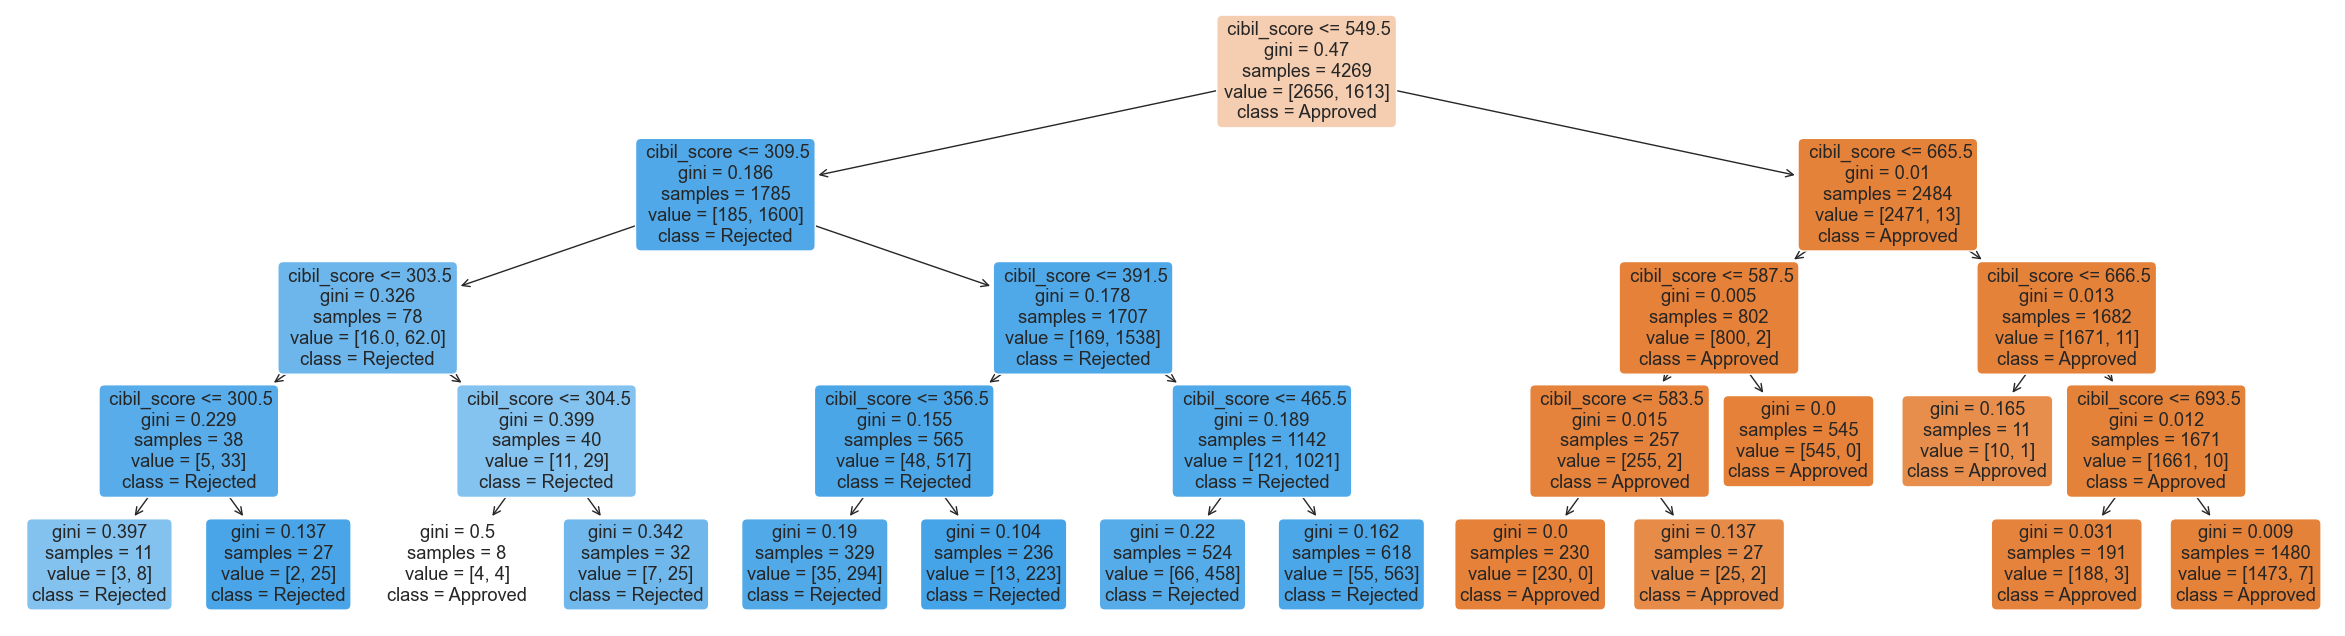

In [472]:
#get the decision tree of credit score of all data
credit_score_df = pd.DataFrame(dataset[" cibil_score"])
loan_status_df = pd.DataFrame(dataset[" loan_status"])
x = credit_score_df
y = loan_status_df
dec_tree = DecisionTreeClassifier(max_depth=4)
dec_tree.fit(x, y)
plt.figure(figsize= (30, 8))
plot_tree(dec_tree, feature_names= x.columns, class_names= ["Approved", "Rejected"], filled=True, rounded = True)

In [473]:
#Classify into intervals
credit_score_df = pd.DataFrame(dataset[[" cibil_score"," loan_status"]])
credit_score_df['credit_score_rank'] = pd.cut(credit_score_df[' cibil_score'], bins=[-1,299,400,500,600,700,800,float('inf')], labels=['Below 300','300-399', '400-499','500-599','600-699','700-799','Above 800']) 

credit_score_df.groupby(['credit_score_rank',]).count() #check  number of people in every category

,cibil_score,loan_status
credit_score_rank,,
Below 300,0,0
300-399,712,712
400-499,694,694
500-599,738,738
600-699,700,700
700-799,734,734
Above 800,691,691


In [474]:
#create a function to return probability
def approval_probability(cscore,dataset):
    approved = dataset[dataset[" loan_status"] == " Approved"]
    x = int(cscore/100)
    upper = str(x*100)
    lower = str(x*100+99)
    if(x>=8):comp = 'Above 800'
    elif(x<3): comp = 'Below 300'
    else: comp = upper + '-' + lower
    y = approved[approved["credit_score_rank"] == comp]
    z = dataset[dataset["credit_score_rank"] == comp]
    print("The approval rate of your loan is:",end=" ")
    if(len(z)<=0): print(0,"%",end = ' ')
    else: print(round(len(y)/len(z),4) * 100,"%",end=' ')
    print("according to your credit score")
            
            


## All the output the users should see:

In [477]:
import numpy as np
print("According to the information you provided as followed: ")
print("Credit Score = ", credit_score)
print("Annual Income = $",input_income)
print()
print("We provide the following analysis: ")
if(np.isnan(mean) == True): print("We are not able to find any case of approval with the provided credit score and annual income")
else:
    print("The upper bound of the loan you can take is\t $", round(mean + standard_deviation,2))
    print("The average(mean) of the loan you can take is\t $", round(mean,2)) #can change the rounding to whichever suitable i.e use -1 for the nearest 10 and so on
    print("The lower bound of the loan you can take is\t $", round(mean - standard_deviation,2))
print()
approval_probability(credit_score,credit_score_df)

According to the information you provided as followed: 
Credit Score =  200
Annual Income = $ 1000000

We provide the following analysis: 
We are not able to find any case of approval with the provided credit score and annual income

The approval rate of your loan is: 0 % according to your credit score
